In [3]:
import logging
logging.basicConfig(format='\033[93m%(asctime)s %(levelname)s %(name)s:\033[0m %(message)s', level=logging.INFO, datefmt='%I:%M:%S')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.ZigZag.Builder import ZigZagBuilder
import src.ZigZag.Builder as zzc
from src.ZigZag.Constant import VALUE_COL_NAME,FLAG_COL_NAME,DELTA_NEAR_EXT,ANGLE_COL_NAME

In [5]:
np.random.seed(1997)

In [6]:
X = np.cumprod(1 + np.random.randn(300) * 0.01)

In [7]:
from datetime import date
from datetime import timedelta 
start_date = date(2000,1,1)
start_date.weekday
x_dt_idx = []
for i in range(300):
    x_dt_idx.append(start_date)
    start_date = start_date+timedelta(days=1)
    while start_date.weekday() >= 5:
        start_date = start_date+timedelta(days=1)

In [8]:
x_sr = pd.Series(X,index=x_dt_idx)
increaser = 1
def increase(x):
    global increaser
    increaser = increaser+0.005
    return x*increaser
x_sr = x_sr.apply(lambda x: increase(x))
x_sr

2000-01-01    1.009469
2000-01-03    1.014741
2000-01-04    1.019599
2000-01-05    1.026967
2000-01-06    1.044660
                ...   
2001-02-16    2.441832
2001-02-19    2.494932
2001-02-20    2.509605
2001-02-21    2.534710
2001-02-22    2.570228
Length: 300, dtype: float64

In [9]:
zzb = ZigZagBuilder(0.03, -0.03)

In [10]:
zzb_df = zzb.build_all(x_sr)
zzb_df

,Flag,Value,Angle,Nearest_Ext,Delta_Near_Ext
2000-01-01,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2001-02-16,NaN,NaN,NaN,NaN,NaN
2001-02-19,NaN,NaN,NaN,NaN,NaN
2001-02-20,NaN,NaN,NaN,NaN,NaN
2001-02-21,NaN,NaN,NaN,NaN,NaN


In [11]:
zzb_df[zzb_df[FLAG_COL_NAME]!=0]

,Flag,Value,Angle,Nearest_Ext,Delta_Near_Ext
2000-01-01,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2001-02-16,NaN,NaN,NaN,NaN,NaN
2001-02-19,NaN,NaN,NaN,NaN,NaN
2001-02-20,NaN,NaN,NaN,NaN,NaN
2001-02-21,NaN,NaN,NaN,NaN,NaN


ValueError: Axis limits cannot be NaN or Inf

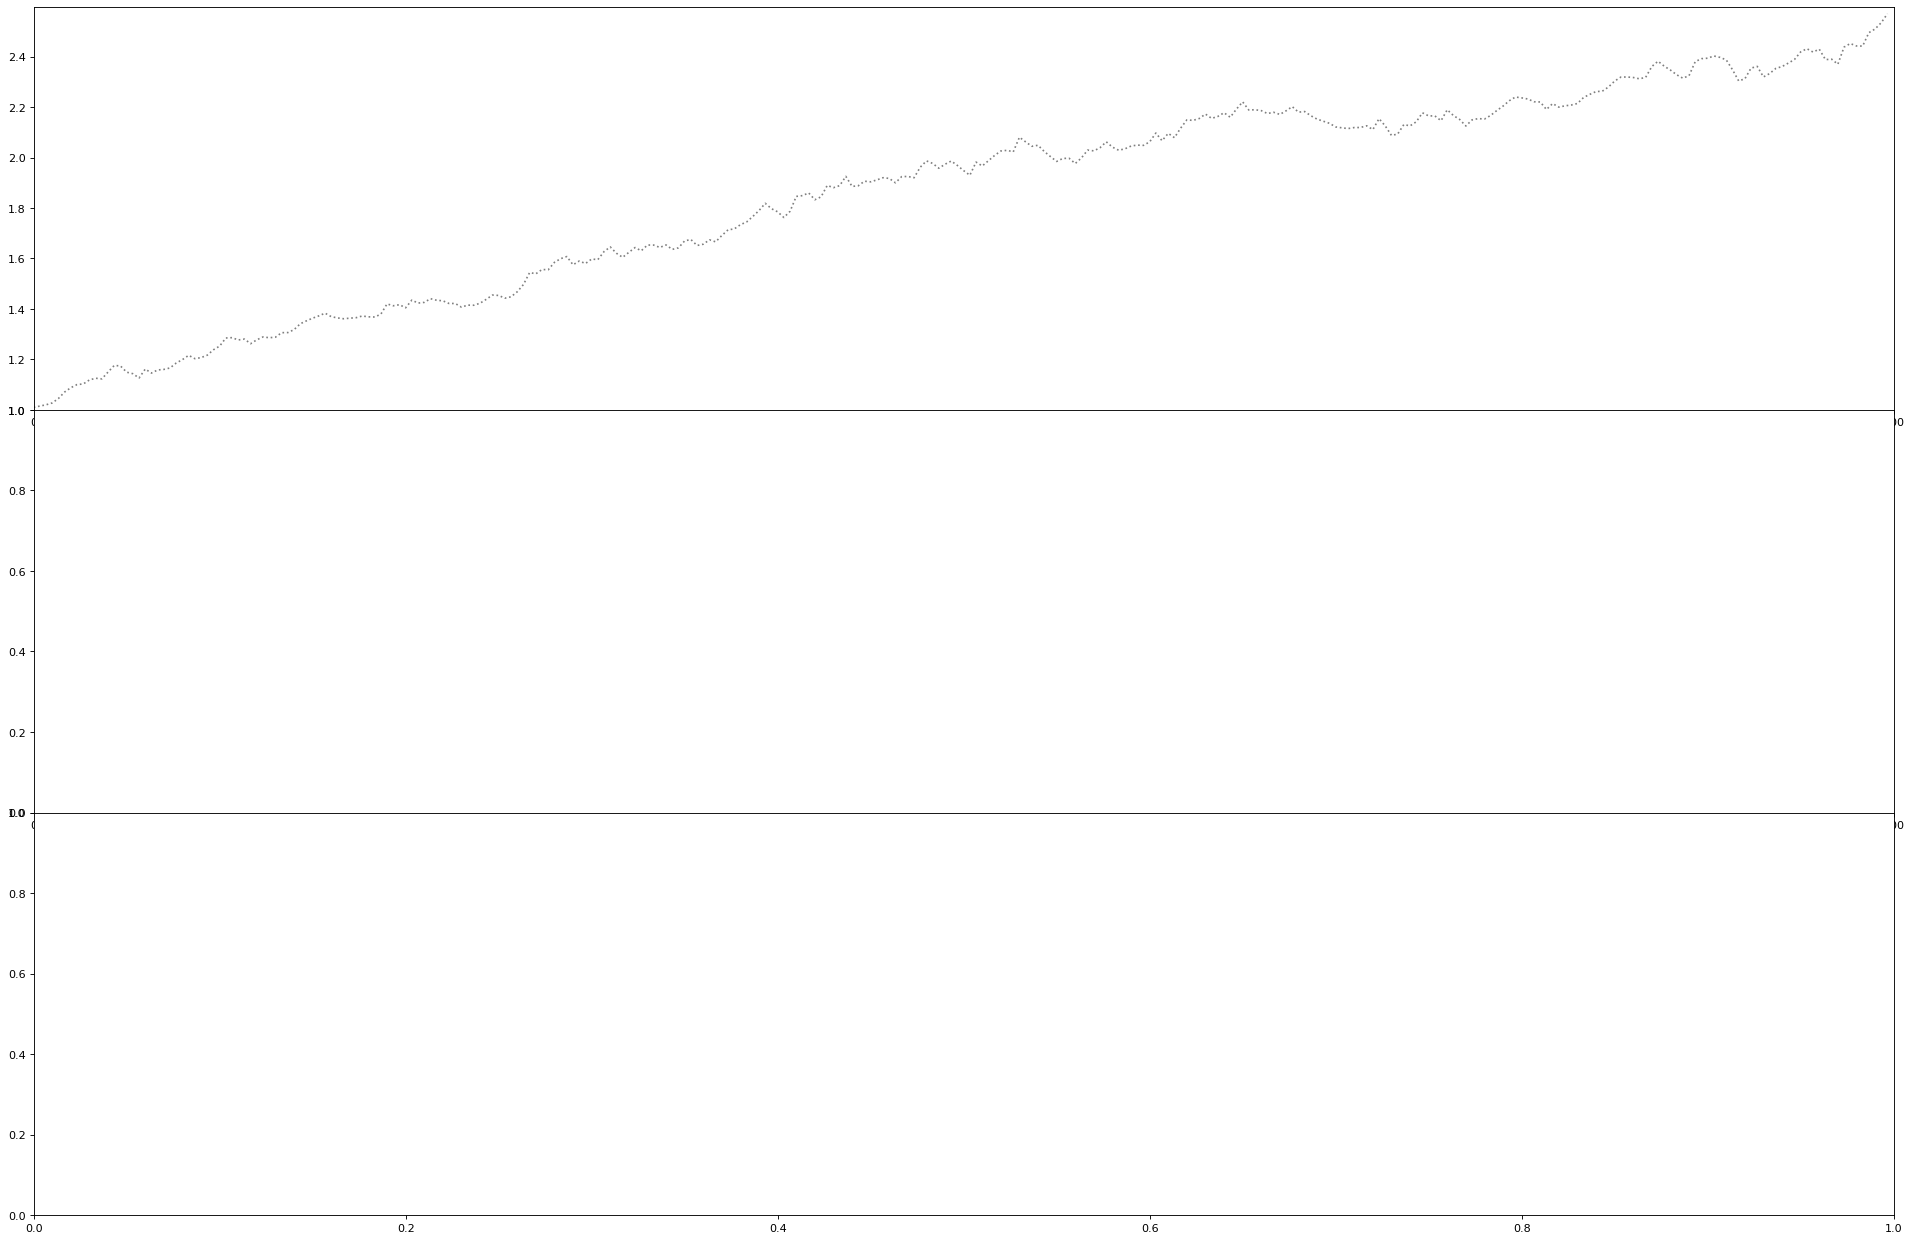

In [12]:
f, axs = plt.subplots(3,1,figsize=(30,20), dpi=80)
plt.subplots_adjust(hspace=0)

axs[0].set_xlim(0, len(X))
axs[0].set_ylim(x_sr.min()*0.99, x_sr.max()*1.01)
axs[0].plot(np.arange(len(x_sr)), x_sr, 'k:', alpha=0.5)
axs[0].plot(np.arange(len(X)), zzb_df[zzc.VALUE_COL_NAME], 'k-')
axs[0].scatter(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] == 1], zzb_df[zzc.VALUE_COL_NAME][zzb_df[zzc.FLAG_COL_NAME] == 1], color='g')
axs[0].scatter(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] == -1], zzb_df[zzc.VALUE_COL_NAME][zzb_df[zzc.FLAG_COL_NAME] == -1], color='r')
axs[0].plot(np.arange(len(X)), zzb_df[zzc.NEAREST_EXT], 'b:')

axs[1].set_xlim(0, len(X))
axs[1].set_ylim(zzb_df[zzc.ANGLE_COL_NAME].min()*1.10, zzb_df[zzc.ANGLE_COL_NAME].max()*1.10)
axs[1].bar(np.arange(len(X)), zzb_df[zzc.ANGLE_COL_NAME])

axs[2].set_xlim(0, len(X))
axs[2].set_ylim(zzb_df[zzc.DELTA_NEAR_EXT].min()*0.99, zzb_df[zzc.DELTA_NEAR_EXT].max()*1.01)
axs[2].plot(np.arange(len(X)), zzb_df[zzc.DELTA_NEAR_EXT], 'k:')
axs[2].hlines(0,xmin=0,xmax=len(X), colors='grey')

for i in range(len(axs)):   
    axs[i].vlines(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] != 0],*axs[i].get_ylim(),"grey")

In [ ]:
from src.ZigZag.Vizualize import draw_chart

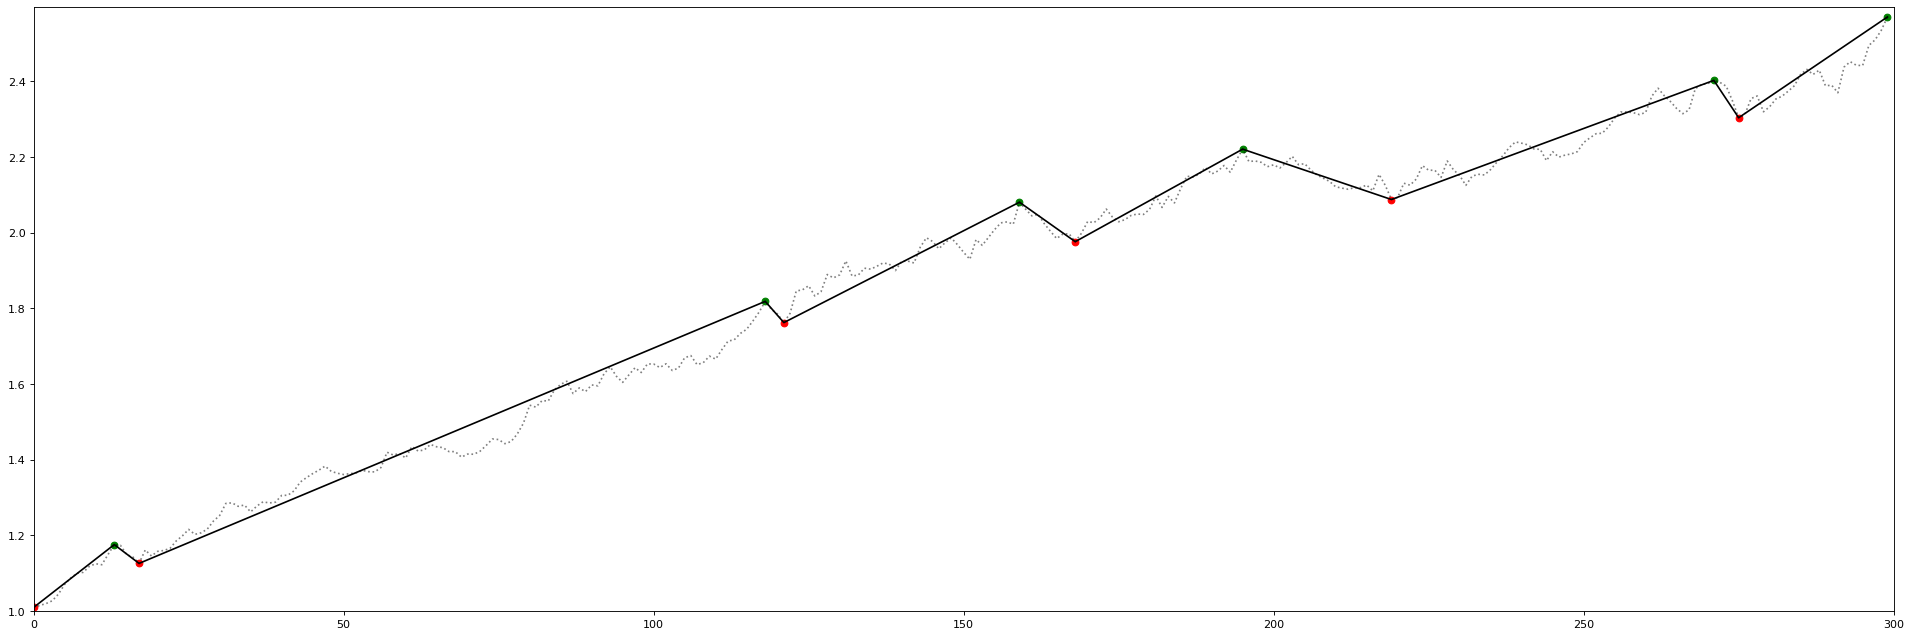

In [ ]:
draw_chart(x_sr, zzb_df)

# ProfitCalculator

In [ ]:
moves = zzb_df[zzb_df[FLAG_COL_NAME]!=0][[VALUE_COL_NAME,DELTA_NEAR_EXT]].abs()
moves.head()

,Value,Delta_Near_Ext
0,1.009469,0.165997
13,1.175465,0.049659
17,1.125806,0.692607
118,1.818413,0.056117
121,1.762296,0.318214


In [ ]:
perc_moves = moves[DELTA_NEAR_EXT]/moves[VALUE_COL_NAME]
perc_moves.head()

0      0.164440
13     0.042246
17     0.615210
118    0.030861
121    0.180568
dtype: float64

In [ ]:
print(f"sum {perc_moves.sum()}")
print(f"mult {(perc_moves+1).product()}")

sum 1.5747768300572997
mult 3.9889019926664524


# ParameterConfigurator

In [ ]:
from src.ZigZag.Configurator.ParameterConfigurator import Search_by_range,check_no_same_move_direction,Check_len_size,Check_machine

In [ ]:
search_res = Search_by_range(x_sr,np.arange(-0.4, 0.4, 0.03),np.arange(-0.4, 0, 0.03),check_func=check_no_same_move_direction)
search_res

(0.02000000000000035, -0.009999999999999676)

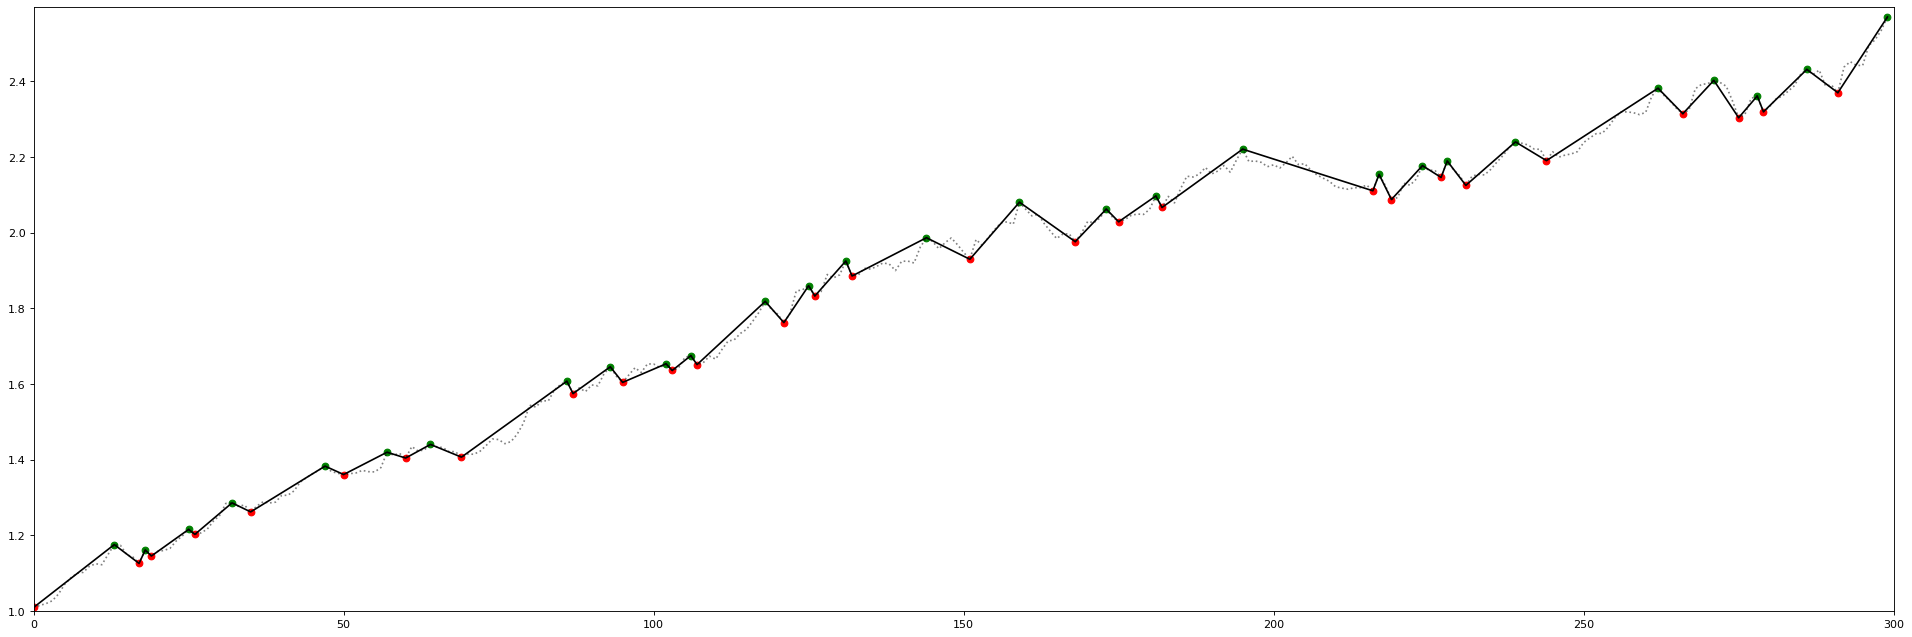

In [ ]:
opt_zzb = ZigZagBuilder(*search_res)
opt_zz = opt_zzb.build_all(x_sr)
draw_chart(x_sr,opt_zz)

In [ ]:
len_checker = Check_len_size(2)
chk_machine = Check_machine([check_no_same_move_direction, len_checker.check])

In [ ]:
search_res2 = Search_by_range(x_sr,np.arange(-0.4, 0.4, 0.03),np.arange(-0.4, 0, 0.03),check_func=chk_machine.check_is_correct)
search_res2

(0.05000000000000038, -0.0399999999999997)

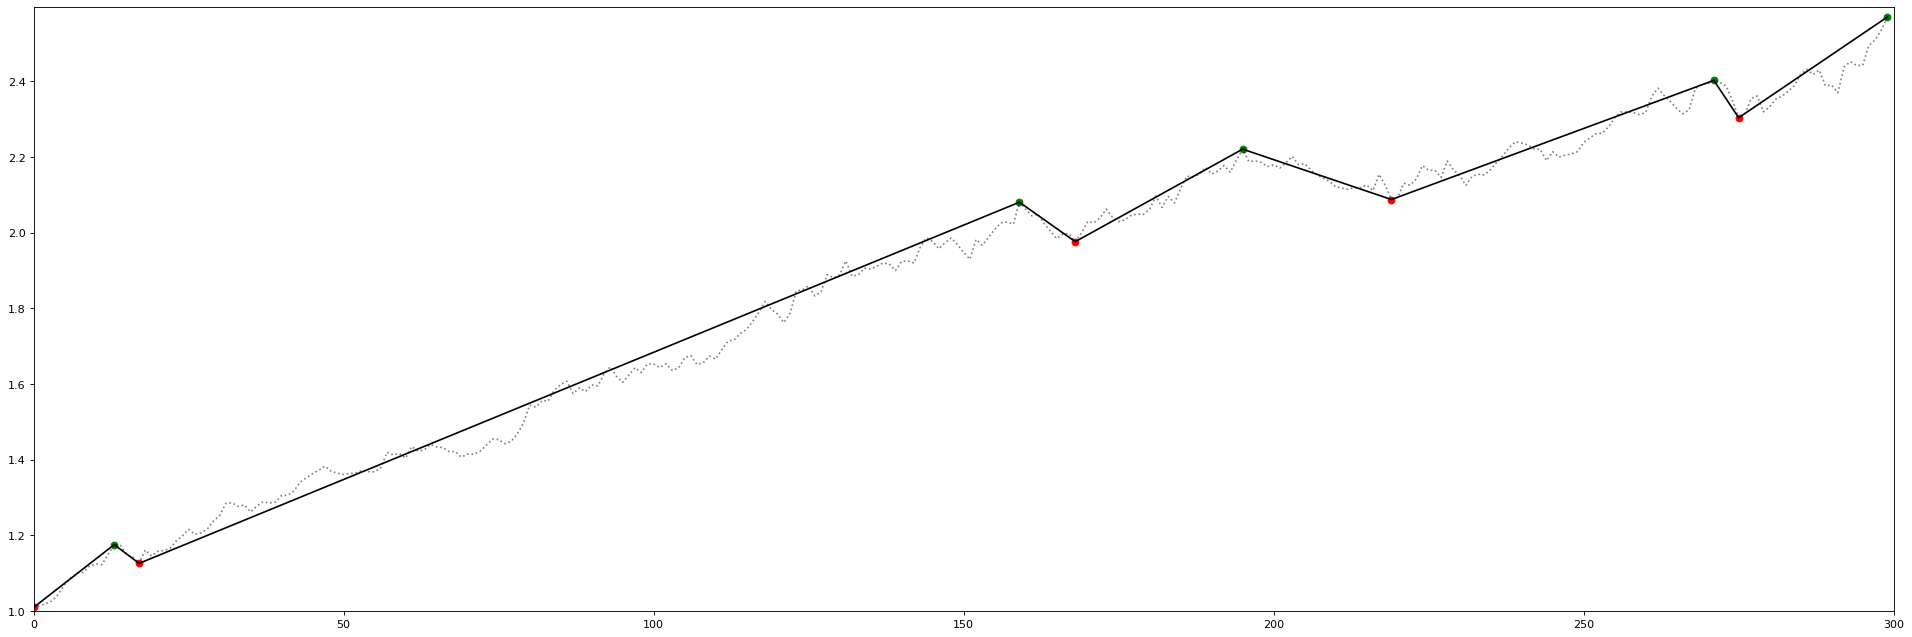

In [ ]:
opt_zz2 = ZigZagBuilder(*search_res2).build_all(x_sr)
draw_chart(x_sr,opt_zz2)